In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
%matplotlib inline

In [51]:
#read file
yelp_business_df = pd.read_csv('yelp_academic_dataset_business.csv')
yelp_review_df = pd.read_csv('yelp_academic_dataset_review.csv')

In [52]:
yelp_business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42153 entries, 0 to 42152
Columns: 105 entries, business_id to attributes.Ambience.upscale
dtypes: bool(1), float64(4), int64(1), object(99)
memory usage: 33.5+ MB


In [53]:
yelp_business_df.shape

(42153, 105)

In [54]:
yelp_business_df.head()

,business_id,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,...,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Hair Types Specialized In.perms,attributes.Music.jukebox,attributes.Ambience.upscale
0,vcNAWiLM4dR7D2nwwJ7nCA,NaN,NaN,NaN,8:00,NaN,NaN,NaN,NaN,8:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JwUE5GmEO-sH1FuwJgKBlQ,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,casual,NaN,True,NaN,NaN,False,NaN,NaN,False
2,uGykseHzyS5xAMWoN6YUqA,False,NaN,NaN,6:00,NaN,NaN,NaN,NaN,6:00,...,NaN,casual,NaN,True,NaN,NaN,False,NaN,NaN,False
3,LRKJF43s9-3jG9Lgx4zODg,NaN,NaN,NaN,10:30,NaN,NaN,NaN,NaN,10:30,...,NaN,casual,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
4,RgDg-k9S5YD_BaxMckifkg,NaN,NaN,NaN,11:00,NaN,NaN,NaN,NaN,11:00,...,NaN,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
yelp_business_df.describe()

,latitude,attributes.Price Range,review_count,stars,longitude
count,42153.000000,27957.000000,42153.000000,42153.000000,42153.000000
mean,36.528631,1.782630,29.332313,3.674649,-104.090080
std,5.824484,0.721778,92.499249,0.886985,28.369369
min,32.876638,1.000000,3.000000,1.000000,-115.369725
25%,33.476439,1.000000,4.000000,3.000000,-115.136180
50%,33.678615,2.000000,8.000000,3.500000,-112.068200
75%,36.142107,2.000000,21.000000,4.500000,-111.882427
max,56.033777,4.000000,4084.000000,5.000000,-3.050088


In [119]:
yelp_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125458 entries, 0 to 1125457
Data columns (total 10 columns):
user_id         1125458 non-null object
review_id       1125458 non-null object
text            1125457 non-null object
votes.cool      1125458 non-null int64
business_id     1125458 non-null object
votes.funny     1125458 non-null int64
stars           1125458 non-null int64
date            1125458 non-null object
type            1125458 non-null object
votes.useful    1125458 non-null int64
dtypes: int64(4), object(6)
memory usage: 85.9+ MB


In [56]:
yelp_review_df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,dr. goldberg offers everything i look for in a...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,5,2007-05-17,review,2
1,H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,"Unfortunately, the frustration of being Dr. Go...",0,vcNAWiLM4dR7D2nwwJ7nCA,0,2,2010-03-22,review,2
2,zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,Dr. Goldberg has been my doctor for years and ...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-02-14,review,1
3,KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,Been going to Dr. Goldberg for over 10 years. ...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-03-02,review,0
4,zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,Got a letter in the mail last week that said D...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-05-15,review,2


In [57]:
yelp_review_df.shape

(1125458, 10)

In [58]:
yelp_review_df.describe()

,votes.cool,votes.funny,stars,votes.useful
count,1.125458e+06,1.125458e+06,1.125458e+06,1.125458e+06
mean,6.533705e-01,5.250805e-01,3.737435e+00,1.132278e+00
std,1.712005e+00,1.633618e+00,1.299347e+00,2.125121e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00
max,1.370000e+02,1.410000e+02,5.000000e+00,1.660000e+02


In [59]:
#DataFtame for restaurants
buisness_n = yelp_business_df[yelp_business_df['categories'].str.contains('Restaurant') == True]

In [60]:
buisness_n.count()

business_id                                   14303
attributes.Ambience.divey                     10248
attributes.Dietary Restrictions.vegan           106
attributes.Happy Hour                          1191
hours.Thursday.open                            8096
                                              ...  
attributes.Open 24 Hours                        223
attributes.Ambience.romantic                  10662
attributes.Hair Types Specialized In.perms        0
attributes.Music.jukebox                        944
attributes.Ambience.upscale                   10578
Length: 105, dtype: int64

In [70]:
#DataFrame for Chinese restaurants
chinese_res = buisness_n[buisness_n['categories'].str.contains('Chinese') == True]

In [125]:
sum(yelp_business_df.duplicated())

0

In [4]:
sum(yelp_review_df.duplicated())

0

In [61]:
#Check categories
yelp_business_df['categories'].value_counts()

Mexican;Restaurants                                                           1230
Pizza;Restaurants                                                              709
Beauty & Spas;Nail Salons                                                      681
Food;Coffee & Tea                                                              665
Hotels & Travel;Event Planning & Services;Hotels                               632
                                                                              ... 
Women's Clothing;Leather Goods;Fashion;Shopping;Accessories                      1
Fast Food;Restaurants;Turkish                                                    1
Hair Salons;Nail Salons;Blow Dry/Out Services;Makeup Artists;Beauty & Spas       1
Bars;Wine Bars;Nightlife;Lounges;Italian;Restaurants                             1
Fast Food;Hot Dogs;American (Traditional);Restaurants                            1
Name: categories, Length: 5944, dtype: int64

In [62]:
#Check correlation in Review dataset
corr = yelp_review_df.corr()
print(corr)

              votes.cool  votes.funny     stars  votes.useful
votes.cool      1.000000     0.802174  0.059016      0.850280
votes.funny     0.802174     1.000000 -0.046458      0.740163
stars           0.059016    -0.046458  1.000000     -0.043550
votes.useful    0.850280     0.740163 -0.043550      1.000000


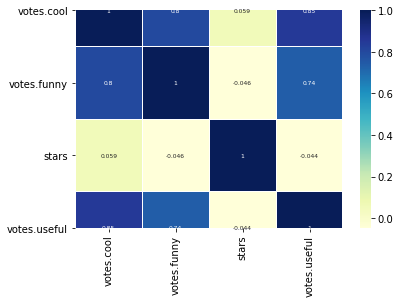

In [63]:
sns.heatmap(corr,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.1,
            annot_kws={"size": 6})
# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.gca().xaxis.tick_bottom()
plt.show()

In [66]:
yelp_review_df['length']=yelp_review_df['text'].str.len()
yelp_review_df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,length
0,Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,dr. goldberg offers everything i look for in a...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,5,2007-05-17,review,2,534.0
1,H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,"Unfortunately, the frustration of being Dr. Go...",0,vcNAWiLM4dR7D2nwwJ7nCA,0,2,2010-03-22,review,2,643.0
2,zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,Dr. Goldberg has been my doctor for years and ...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-02-14,review,1,306.0
3,KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,Been going to Dr. Goldberg for over 10 years. ...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-03-02,review,0,495.0
4,zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,Got a letter in the mail last week that said D...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-05-15,review,2,259.0


In [9]:
corr = yelp_review_df.corr()
print(corr)

              votes.cool  votes.funny     stars  votes.useful    length
votes.cool      1.000000     0.802174  0.059016      0.850280  0.253713
votes.funny     0.802174     1.000000 -0.046458      0.740163  0.237459
stars           0.059016    -0.046458  1.000000     -0.043550 -0.135540
votes.useful    0.850280     0.740163 -0.043550      1.000000  0.328340
length          0.253713     0.237459 -0.135540      0.328340  1.000000


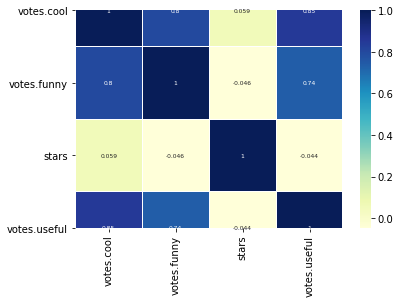

In [64]:
sns.heatmap(corr,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.1,
            annot_kws={"size": 6})
# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.gca().xaxis.tick_bottom()
plt.show()

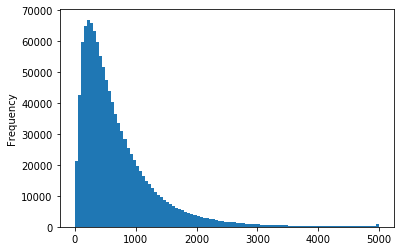

In [67]:
yelp_review_df['length'].plot(bins=100,kind='hist');

In [12]:
yelp_review_df.describe()

,votes.cool,votes.funny,stars,votes.useful,length
count,1.125458e+06,1.125458e+06,1.125458e+06,1.125458e+06,1.125457e+06
mean,6.533705e-01,5.250805e-01,3.737435e+00,1.132278e+00,6.962579e+02
std,1.712005e+00,1.633618e+00,1.299347e+00,2.125121e+00,6.353025e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,2.700000e+02
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,5.120000e+02
75%,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,9.120000e+02
max,1.370000e+02,1.410000e+02,5.000000e+00,1.660000e+02,5.000000e+03


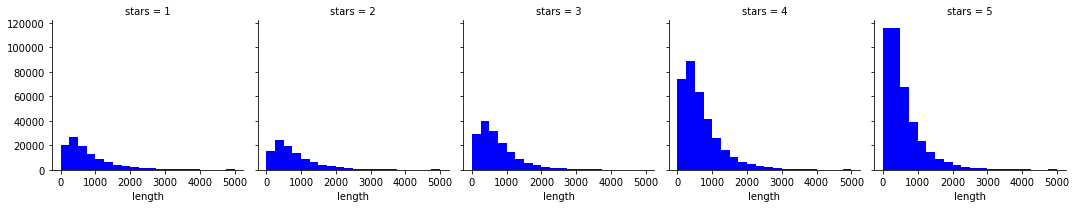

In [68]:
g=sns.FacetGrid(data=yelp_review_df,col='stars',col_wrap=5)
g.map(plt.hist,'length',bins=20,color='b');

In [72]:
#Chinese restaurant review
df_chinese_review = yelp_review_df.loc[yelp_review_df['business_id'].isin(chinese_res.business_id)]

In [57]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
import gc # garbage collector

from collections import Counter # for counting commong words
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [14]:
from textblob import TextBlob

In [73]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
df_chinese_review['text_clear'] = df_chinese_review['text'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

df_chinese_review['senti_polarity'] = df_chinese_review['text_clear'].apply(sentiment)

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


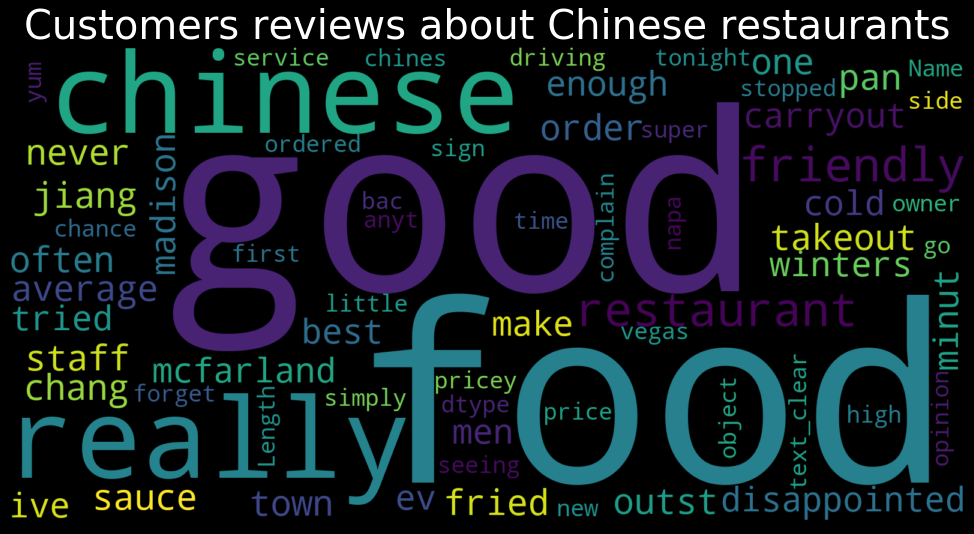

In [50]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(df_chinese_review['text_clear']))
# figure of graph
plt.figure(figsize=(20,10), facecolor='k')
# add the title to the graph
plt.title("Customers reviews about Chinese restaurants", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# finally show the plot
plt.show()

In [74]:
#Mexican restaurant 
Mexican_res = buisness_n[buisness_n['categories'].str.contains('Mexican') == True]

In [75]:
#Mexican restaurant review
df_Mexican_review = yelp_review_df.loc[yelp_review_df['business_id'].isin(Mexican_res.business_id)]

In [76]:
df_Mexican_review['text_clear'] = df_Mexican_review['text'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

df_Mexican_review['senti_polarity'] = df_Mexican_review['text_clear'].apply(sentiment)

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


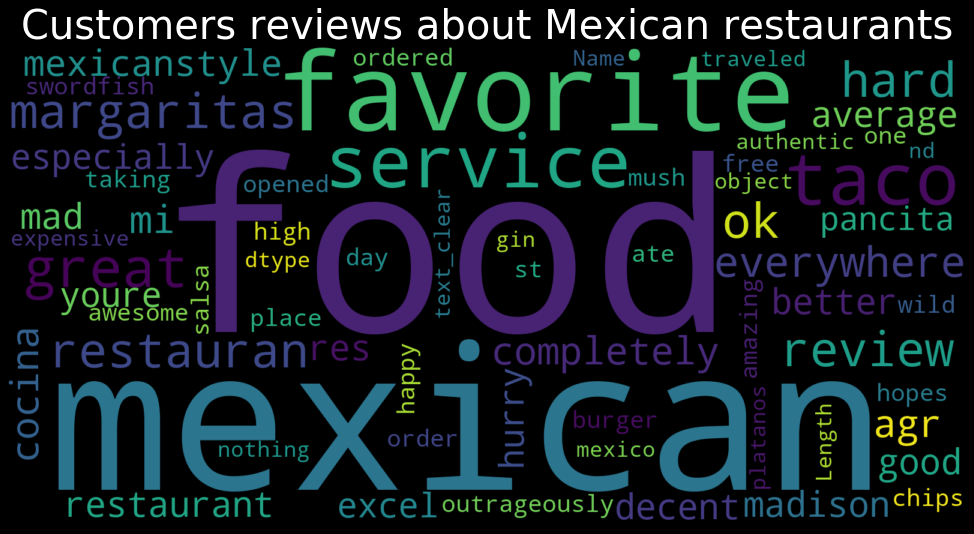

In [64]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(df_Mexican_review['text_clear']))
# figure of graph
plt.figure(figsize=(20,10), facecolor='k')
# add the title to the graph
plt.title("Customers reviews about Mexican restaurants", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# finally show the plot
plt.show()

In [65]:
#American restaurant
American_res = buisness_n[buisness_n['categories'].str.contains('American') == True]

In [66]:
#American restautrant review
df_American_review = yelp_review_df.loc[yelp_review_df['business_id'].isin(American_res.business_id)]

In [67]:
df_American_review['text_clear'] = df_American_review['text'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

df_American_review['senti_polarity'] = df_American_review['text_clear'].apply(sentiment)

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


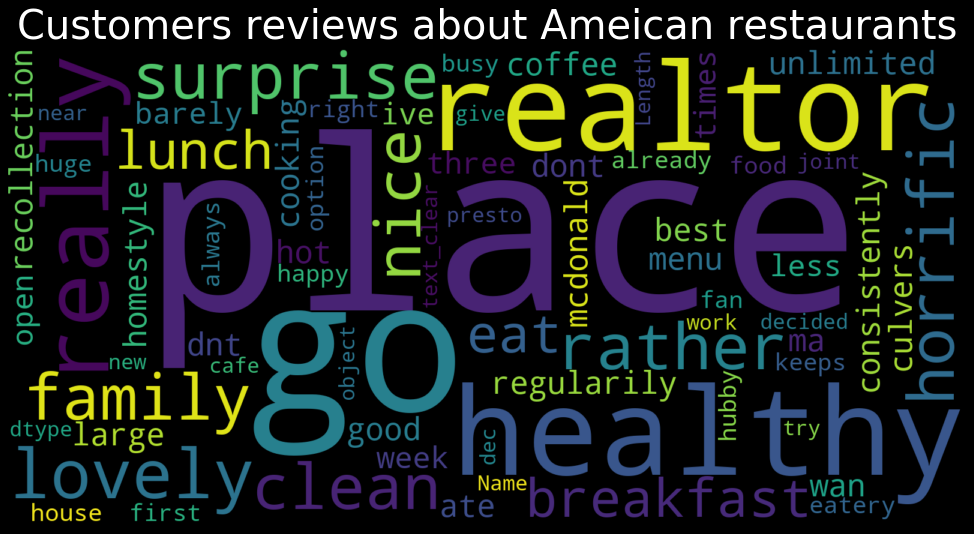

In [70]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(df_American_review['text_clear']))
# figure of graph
plt.figure(figsize=(20,10), facecolor='k')
# add the title to the graph
plt.title("Customers reviews about Ameican restaurants", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# finally show the plot
plt.show()

In [77]:
#Mon Ami Gabi - Top rated restaurant
MonAmiGabi_df= buisness_n[buisness_n['name'].str.contains('Mon Ami Gabi') == True]
print(MonAmiGabi_df['name'])

11983    Mon Ami Gabi
Name: name, dtype: object


In [78]:
#Mon Ami Gabi review
MonAmiGabi_review = yelp_review_df.loc[yelp_review_df['business_id'].isin(MonAmiGabi_df.business_id)]
MonAmiGabi_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3695 entries, 290541 to 294235
Data columns (total 11 columns):
user_id         3695 non-null object
review_id       3695 non-null object
text            3695 non-null object
votes.cool      3695 non-null int64
business_id     3695 non-null object
votes.funny     3695 non-null int64
stars           3695 non-null int64
date            3695 non-null object
type            3695 non-null object
votes.useful    3695 non-null int64
length          3695 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 346.4+ KB


In [79]:
MonAmiGabi_review['text_clear'] = MonAmiGabi_review['text'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

MonAmiGabi_review['senti_polarity'] = MonAmiGabi_review['text_clear'].apply(sentiment)

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


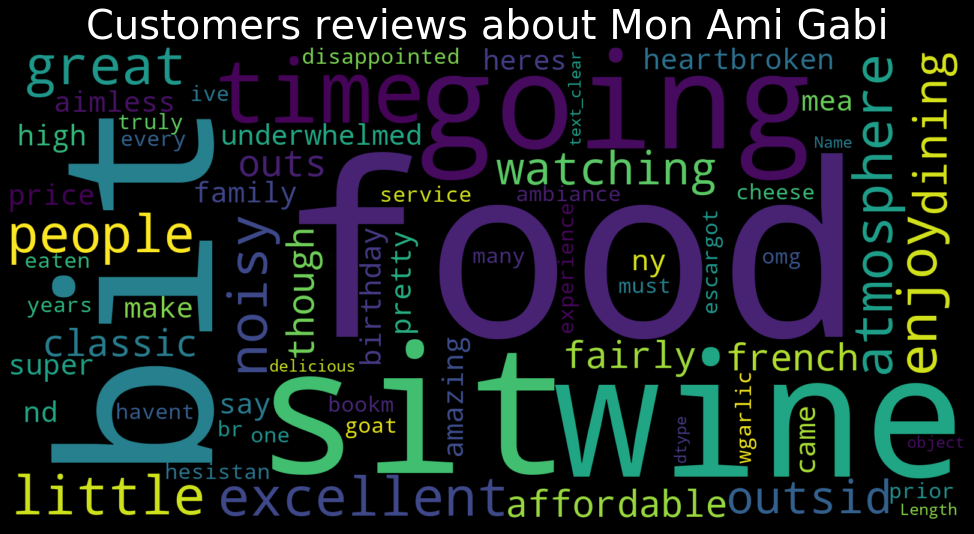

In [19]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(MonAmiGabi_review['text_clear']))
# figure of graph
plt.figure(figsize=(20,10), facecolor='k')
# add the title to the graph
plt.title("Customers reviews about Mon Ami Gabi", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# finally show the plot
plt.show()

In [44]:
#Starbucks dataframe
Starbucks_df= yelp_business_df[yelp_business_df['name'].str.contains('Starbucks') == True]
print(Starbucks_df['name'])

35              Starbucks
268             Starbucks
385             Starbucks
648      Starbucks Coffee
786      Starbucks Coffee
               ...       
41050           Starbucks
41116           Starbucks
41168           Starbucks
41219           Starbucks
41795           Starbucks
Name: name, Length: 320, dtype: object


In [45]:
#Starbucks review
Starbucks_review = yelp_review_df.loc[yelp_review_df['business_id'].isin(Starbucks_df.business_id)]
Starbucks_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 364 to 1121980
Data columns (total 12 columns):
user_id         4018 non-null object
review_id       4018 non-null object
text            4018 non-null object
votes.cool      4018 non-null int64
business_id     4018 non-null object
votes.funny     4018 non-null int64
stars           4018 non-null int64
date            4018 non-null object
type            4018 non-null object
votes.useful    4018 non-null int64
length          4018 non-null float64
intercept       4018 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 408.1+ KB


In [106]:
Starbucks_review['text_clear'] = Starbucks_review['text'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

Starbucks_review['senti_polarity'] = Starbucks_review['text_clear'].apply(sentiment)

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


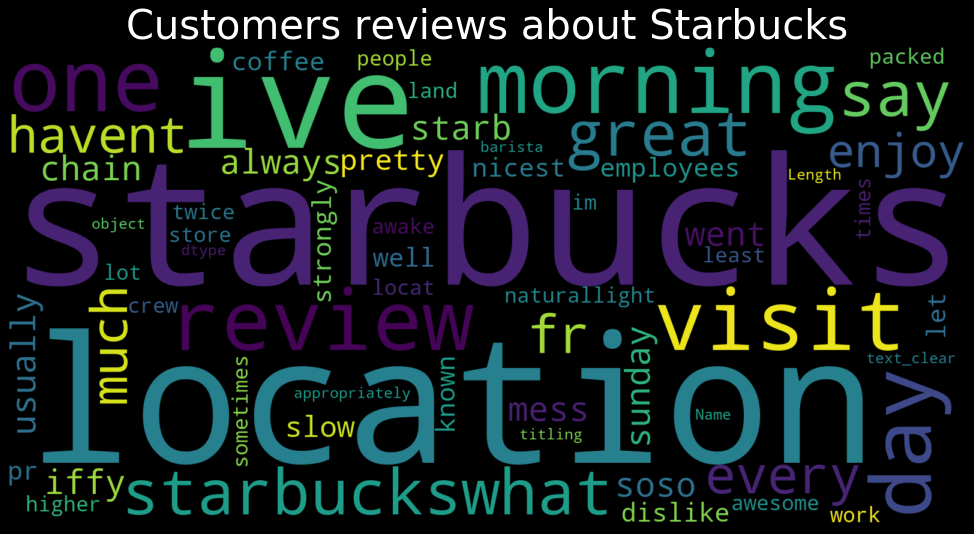

In [107]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(Starbucks_review['text_clear']))
# figure of graph
plt.figure(figsize=(20,10), facecolor='k')
# add the title to the graph
plt.title("Customers reviews about Starbucks", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# finally show the plot
plt.show()

In [23]:
import statsmodels.api as sms;

In [46]:
#Check null value to do regression
yelp_review_df.isnull().sum()

user_id         0
review_id       0
text            1
votes.cool      0
business_id     0
votes.funny     0
stars           0
date            0
type            0
votes.useful    0
intercept       0
length          1
dtype: int64

In [47]:
#drop null
yelp_review_df.dropna(subset=['text'], inplace=True)

In [14]:
yelp_review_df.isnull().sum()

user_id         0
review_id       0
text            0
votes.cool      0
business_id     0
votes.funny     0
stars           0
date            0
type            0
votes.useful    0
length          0
intercept       0
dtype: int64

In [48]:
#Linear regression betwwen stars & length in general
yelp_review_df['intercept'] = 1

lm = sms.OLS(yelp_review_df['stars'], yelp_review_df[['intercept', 'length']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                 2.106e+04
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        19:43:42   Log-Likelihood:            -1.8812e+06
No. Observations:             1125457   AIC:                         3.762e+06
Df Residuals:                 1125455   BIC:                         3.762e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.9304      0.002   2183.173      0.000       3.927       3.934
length        -0.0003   1.91e-06   -145.130      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   108949.423   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134656.405
Skew:                          -0.827   Prob(JB):                         0.00
Kurtosis:                       2.630   Cond. No.                     1.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#Linear regression betwwen votes.useful & length in general
yelp_review_df['intercept'] = 1

lm = sms.OLS(yelp_review_df['votes.useful'], yelp_review_df[['intercept', 'length']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           votes.useful   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                 1.360e+05
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        19:44:06   Log-Likelihood:            -2.3812e+06
No. Observations:             1125457   AIC:                         4.762e+06
Df Residuals:                 1125455   BIC:                         4.762e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3676      0.003    130.939      0.000       0.362       0.373
length         0.0011   2.98e-06    368.772      0.000       0.001       0.001
==============================================================================
Omnibus:                  1442566.780   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        990119023.771
Skew:                           6.618   Prob(JB):                         0.00
Kurtosis:                     147.702   Cond. No.                     1.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#Add length of text to Mon Ami Gabi 
MonAmiGabi_review['length']=MonAmiGabi_review['text'].str.len()
MonAmiGabi_review.head()

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clear,senti_polarity,length,intercept
290541,LAOHN2Z6INbwuGa3fx9UTw,UpKdXO3jEElnqtsWjYxQ2w,"Excellent food, great atmosphere, a bit noisy....",0,4bEjOyTaDG24SY5TxsaUNQ,0,5,2005-06-23,review,0,excellent food great atmosphere bit noisy,0.900000,50,1
290542,H43f_rD3czq0UqY-4zhWjA,qYJV5kIViwer1P1Cb2OSfw,If you enjoy a little people watching with you...,0,4bEjOyTaDG24SY5TxsaUNQ,0,5,2005-10-10,review,0,enjoy little people watching dining sit outsid...,0.425781,710,1
290543,ytjqLRFobRxl0DDJgoR-Eg,dvSLFLzijuT5HLRlmt5FaA,"affordable, fairly classic french food\n\nsit ...",2,4bEjOyTaDG24SY5TxsaUNQ,2,5,2005-10-14,review,2,affordable fairly classic french food sit outs...,0.041667,158,1
290544,pW91HUnVz6ssLZ4dY-ztyQ,y79Q4oMPl-7yFvAIhep18g,Though heartbroken and a bit aimless on my 22n...,2,4bEjOyTaDG24SY5TxsaUNQ,2,4,2005-12-02,review,3,though heartbroken bit aimless nd birthday mea...,0.466667,186,1
290545,aoxuw-XpJYIX1-R0TUS7CQ,yZ-XOxrnx9QKGCgDxIFRag,"The food and wine was amazing, but the super h...",0,4bEjOyTaDG24SY5TxsaUNQ,0,4,2006-01-07,review,1,food wine amazing super high price going make ...,0.259762,271,1


In [26]:
#Mon Ami Gabi - Linear regression betwwen stars & length
MonAmiGabi_review['intercept'] = 1

lm = sms.OLS(MonAmiGabi_review['stars'], MonAmiGabi_review[['intercept', 'length']])
results = lm.fit()
results.summary()

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     46.05
Date:                Fri, 08 May 2020   Prob (F-statistic):           1.34e-11
Time:                        16:39:12   Log-Likelihood:                -5048.9
No. Observations:                3695   AIC:                         1.010e+04
Df Residuals:                    3693   BIC:                         1.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.2663      0.024    176.007      0.000       4.219       4.314
length        -0.0002   2.64e-05     -6.786      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      691.818   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1186.826
Skew:                          -1.217   Prob(JB):                    1.92e-258
Kurtosis:                       4.335   Cond. No.                     1.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#Mon Ami Gabi - Linear regression betwwen votes.useful & length
MonAmiGabi_review['intercept'] = 1

lm = sms.OLS(MonAmiGabi_review['votes.useful'], MonAmiGabi_review[['intercept', 'length']])
results = lm.fit()
results.summary()

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           votes.useful   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     359.0
Date:                Fri, 08 May 2020   Prob (F-statistic):           1.75e-76
Time:                        16:40:10   Log-Likelihood:                -7257.0
No. Observations:                3695   AIC:                         1.452e+04
Df Residuals:                    3693   BIC:                         1.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0226      0.044      0.513      0.608      -0.064       0.109
length         0.0009   4.79e-05     18.948      0.000       0.001       0.001
==============================================================================
Omnibus:                     5475.871   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2608389.806
Skew:                           8.891   Prob(JB):                         0.00
Kurtosis:                     131.942   Cond. No.                     1.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate']
selected_words

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=False)
#corpus = ['This is the first document.','This is the second second document.']
#print corpus
MonAmiGabi_selected_word_count = vectorizer.fit_transform(MonAmiGabi_review['text'].values.astype('U'))
vectorizer.get_feature_names()

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [34]:
MonAmi_word_count_array = MonAmiGabi_selected_word_count.toarray()
MonAmi_word_count_array.shape

(3695, 11)

In [39]:
MonAmi_word_count_array.sum(axis=0)

array([ 312, 2166,  246,  636,  500,   37,  314,   33,   13,   26,   39],
      dtype=int64)

Text(0.5, 1.0, 'Mon Ami Gabi')

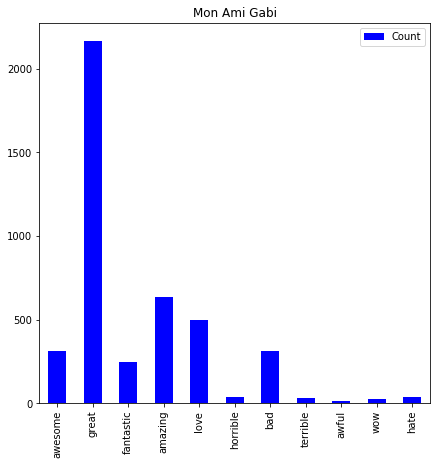

In [42]:
#Mon Ami Gabi
MonAmi_temp = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=MonAmi_word_count_array.sum(axis=0)).rename(columns={0: 'Count'})
MonAmi_temp.plot(kind='bar', stacked=False, figsize=[7,7], colormap='winter')
plt.title("Mon Ami Gabi", fontsize=12,color='black')

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=False)
#corpus = ['This is the first document.','This is the second second document.']
#print corpus
Starbuck_selected_word_count = vectorizer.fit_transform(Starbucks_review['text'].values.astype('U'))
vectorizer.get_feature_names()

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [51]:
Starbuck_word_count_array = Starbuck_selected_word_count.toarray()
Starbuck_word_count_array.shape

(4018, 11)

Text(0.5, 1.0, 'Starbucks')

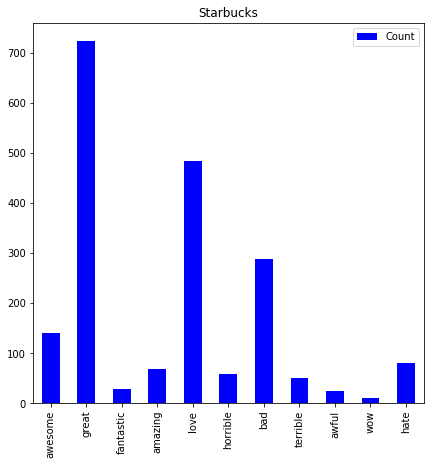

In [57]:
#Starbucks
Starbuck_temp = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=Starbuck_word_count_array.sum(axis=0)).rename(columns={0: 'Count'})
Starbuck_temp.plot(kind='bar', stacked=False, figsize=[7,7], colormap='winter')
plt.title("Starbucks", fontsize=12,color='black')